In [33]:
# Import Dependencies
import pandas as pd
import matplotlib.pyplot as plt
import json


In [34]:
# reading the JSON data using json.load()
file = 'rankings.json'
with open(file) as rankings:
    rank_dict = json.load(rankings)



In [35]:

# converting json dataset from dictionary to dataframe
song_data_df = pd.DataFrame.from_dict(rank_dict['song_data'], orient='index')
artist_data_df = pd.DataFrame.from_dict(rank_dict['artist_data'], orient='index')
# album_data_pd = pd.DataFrame.from_dict(rank_dict['album_data'], orient='index')


In [36]:

# Ensure the ranking list contains unique values
song_ranking_list = list(dict.fromkeys(rank_dict['song_rankings'])) 
artist_ranking_list = list(dict.fromkeys(rank_dict['artist_rankings'])) 
# album_ranking_list = list(dict.fromkeys(rank_dict['album_rankings'])) 

In [37]:
# Convert ranking_list into a dictionary mapping UUIDs to their ranking position
song_ranking_dict = {uuid: rank + 1 for rank, uuid in enumerate(song_ranking_list)}
artist_ranking_dict = {uuid: rank + 1 for rank, uuid in enumerate(artist_ranking_list)}
# album_ranking_dict = {uuid: rank + 1 for rank, uuid in enumerate(album_ranking_list)}


In [38]:

# Add the ranking based on the uuid
song_data_df['ranking'] = song_data_df.index.map(song_ranking_dict)
artist_data_df['ranking'] = artist_data_df.index.map(artist_ranking_dict)
# album_data_pd['ranking'] = song_data_pd.index.map(album_ranking_dict)

# Sort the DataFrame by the ranking column
song_data_df = song_data_df.sort_values('ranking')
artist_data_df = artist_data_df.sort_values('ranking')
# album_data_pd = album_data_pd.sort_values('ranking')

In [39]:
song_data_df.head()


,song_name,artist,album,album_cover,tags,duration_s,total_plays,ranking
dab931a9-a23a-44c7-bb1f-4405d7d6956a,luther (ft. sza),kendrick lamar,Unknown,No Image Available,[],0.0,334,1
9d452dee-943b-4c5a-bb1e-7fdbce1c7b30,Love Story,Taylor Swift,Fearless,https://lastfm.freetls.fastly.net/i/u/300x300/...,"[[country, 100], [taylor swift, 76], [Love, 58...",350.0,10259470,2


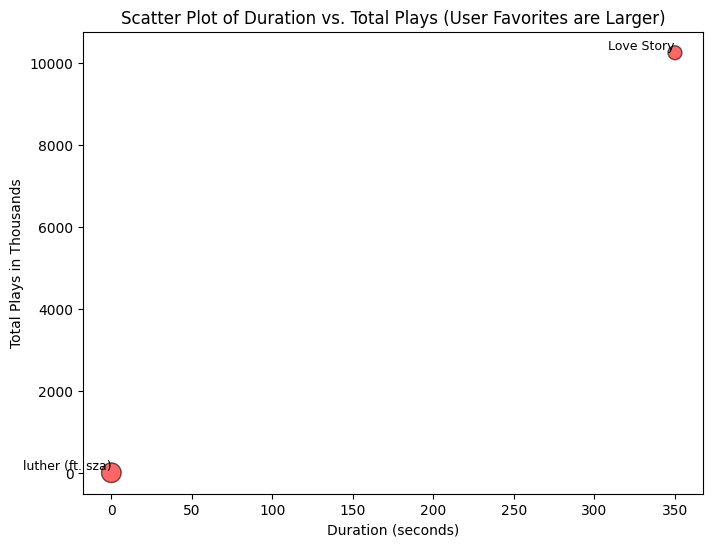

In [43]:
# Build Figure
plt.figure(figsize=(8, 6))

# Make size dependent on user preference
song_data_df['size'] = song_data_df['ranking'].max() / song_data_df['ranking'] * 100  

# Scatter plot using Matplotlib
plt.scatter(song_data_df['duration_s'], song_data_df['total_plays']/1000, s=song_data_df['size'], c='red', alpha=0.6, edgecolors="k")

# Add labels next to points
for i, row in song_data_df.iterrows():
    plt.text(row['duration_s'], row['total_plays']/1000, row['song_name'], fontsize=9, ha='right', va='bottom')

# Add labels and title
plt.xlabel("Duration (seconds)")
plt.ylabel("Total Plays in Thousands")
plt.title("Scatter Plot of Duration vs. Total Plays (User Favorites are Larger)")


# Show the plot
plt.show()